In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
df['target'] = iris.target

In [3]:
df.loc[df['target']==0, 'target_name'] = "setosa"
df.loc[df['target']==1, 'target_name'] = "versicolor"
df.loc[df['target']==2, 'target_name'] = "virginica"
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


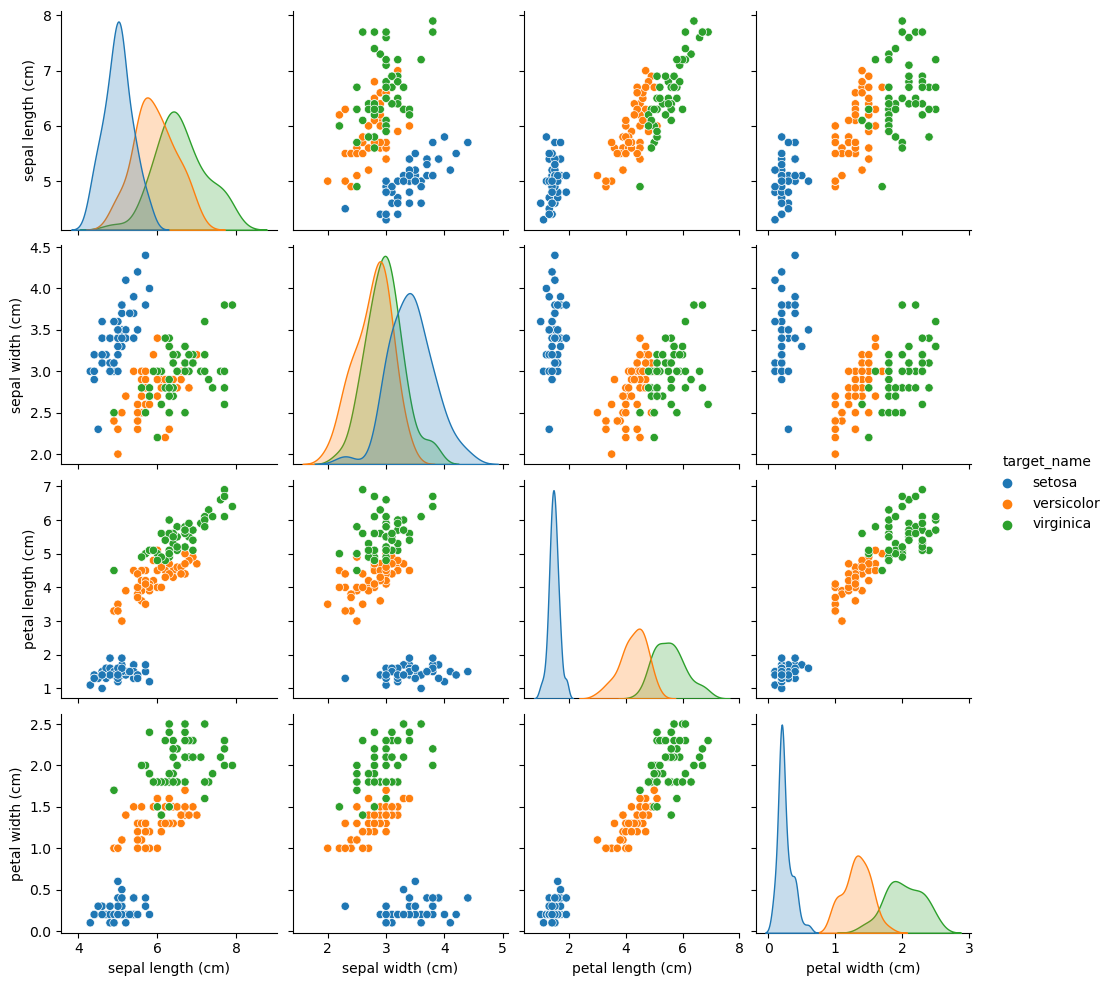

In [4]:
import seaborn as sns
sns.pairplot(df, vars=df.columns[:4], hue='target_name')

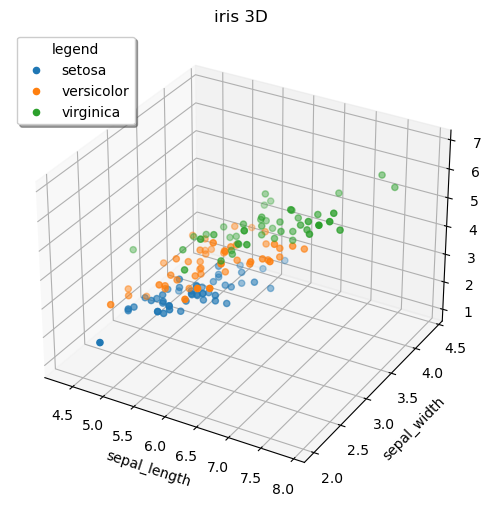

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection="3d")
for c in df['target_name'].unique():
    ax.scatter(df.iloc[:, 0][df['target_name']==c], df.iloc[:, 1][df['target_name']==c], df.iloc[:, 2][df['target_name']==c], label=c)
ax.set_title('iris 3D')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
ax.legend(loc=2, title='legend', shadow=True)
plt.show()

In [6]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(random_state = 0)
X_pc = pca.fit_transform(df.iloc[:,:4])
df_pca = pd.DataFrame(X_pc, columns=['PC{}'.format(i + 1) for i in range(len(X_pc[0]))])
print('主成分の数: ', pca.n_components_)
print('保たれている情報: ', np.sum(pca.explained_variance_ratio_))
display(df_pca.head())

主成分の数:  4
保たれている情報:  1.0


,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


<Axes: xlabel='PC1', ylabel='PC2'>

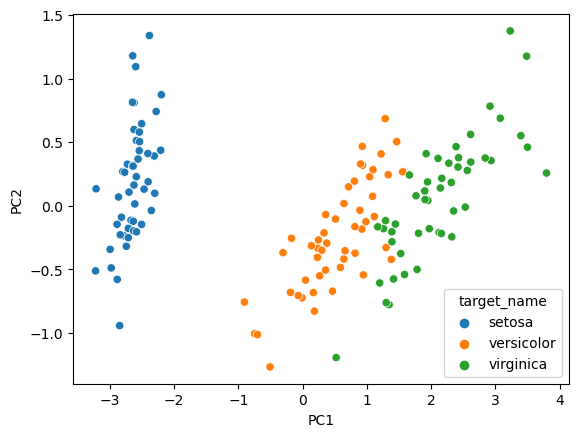

In [7]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca, hue=df['target_name'])

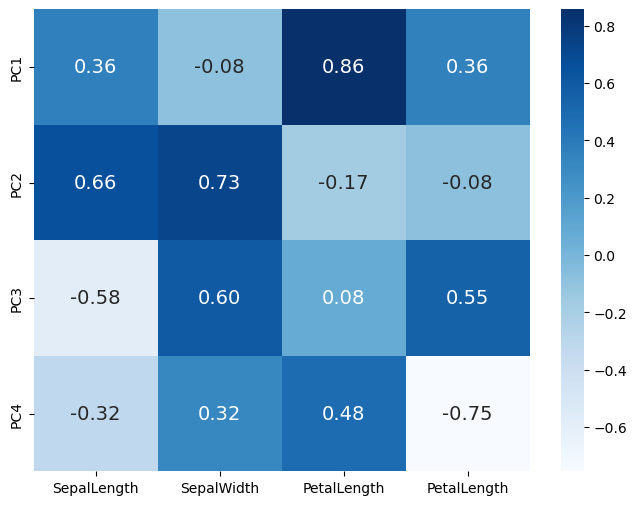

In [8]:
import seaborn as sns
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.heatmap(pca.components_,
            cmap='Blues',
           annot=True,
           annot_kws={'size': 14},
           fmt='.2f',
           xticklabels=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalLength'],
           yticklabels=['PC1', 'PC2', 'PC3', 'PC4'],
           ax = ax)
plt.show()

In [9]:
import pandas as pd

df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', \
                  'OD280/OD315 of diluted wines', 'Proline']
display(df_wine.shape)
display(df_wine.head())

(178, 14)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


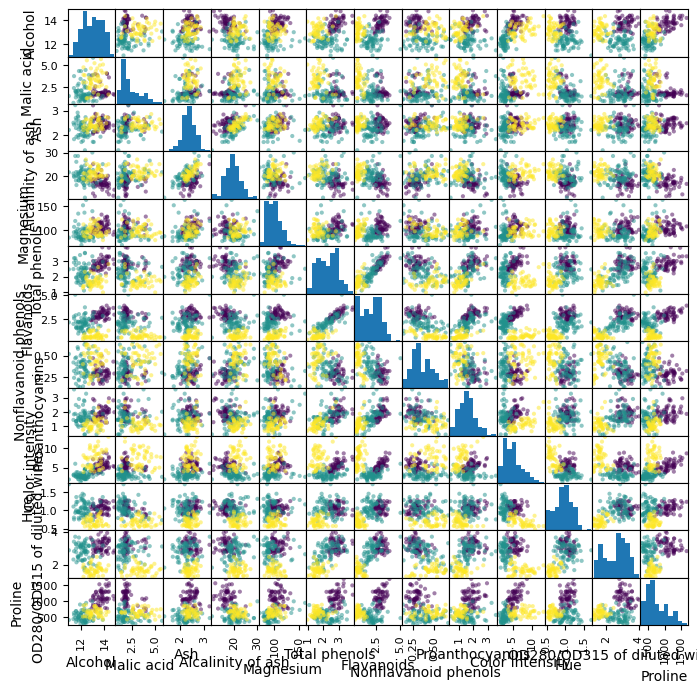

In [10]:
from pandas import plotting
plotting.scatter_matrix(df_wine.iloc[:, 1:], figsize = (8, 8), c = (df_wine.iloc[:, 0]), alpha = 0.5)
plt.show()

In [11]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np

sc = preprocessing.StandardScaler()
X = df_wine.iloc[:, 1:]
X_norm = sc.fit_transform(X)

pca = PCA(random_state = 0)
X_pc = pca.fit_transform(X_norm)
print(X_pc)

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01 ... -4.51563395e-01
   5.40810414e-01 -6.62386309e-02]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00 ... -1.42657306e-01
   3.88237741e-01  3.63650247e-03]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01 ... -2.86672847e-01
   5.83573183e-04  2.17165104e-02]
 ...
 [-2.67783946e+00 -2.76089913e+00 -9.40941877e-01 ...  5.12492025e-01
   6.98766451e-01  7.20776948e-02]
 [-2.38701709e+00 -2.29734668e+00 -5.50696197e-01 ...  2.99821968e-01
   3.39820654e-01 -2.18657605e-02]
 [-3.20875816e+00 -2.76891957e+00  1.01391366e+00 ... -2.29964331e-01
  -1.88787963e-01 -3.23964720e-01]]


In [12]:
df_pca = pd.DataFrame(X_pc, columns=['PC{}'.format(i + 1) for i in range(len(X_pc[0]))])

In [13]:
print('主成分の数: ', pca.n_components_)
print('保たれている情報: ', round(np.sum(pca.explained_variance_ratio_),2))
display(df_pca.head())

主成分の数:  13
保たれている情報:  1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [14]:
print(df_pca.shape)

(178, 13)


In [15]:
pd.DataFrame(np.round(pca.explained_variance_, 2), index = ['PC{}'.format(i + 1) for i \
                                                            in range(len(df_pca.columns))], columns=['固有値'])

,固有値
PC1,4.73
PC2,2.51
PC3,1.45
PC4,0.92
PC5,0.86
PC6,0.65
PC7,0.55
PC8,0.35
PC9,0.29
PC10,0.25


In [16]:
line = np.ones(14)
print(line)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


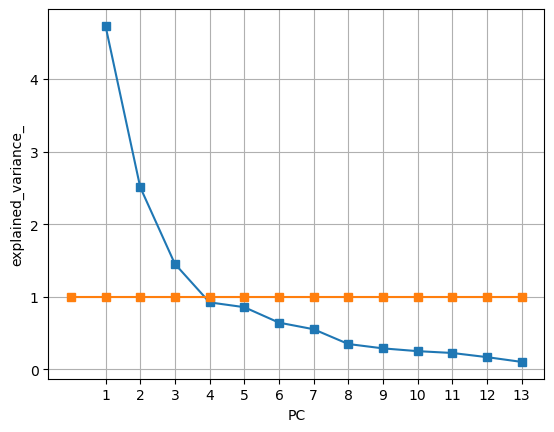

In [17]:
plt.plot(np.append(np.nan, pca.explained_variance_), 's-')
plt.plot(line, 's-')
plt.xlabel('PC')
plt.ylabel('explained_variance_')
plt.xticks(np.arange(1, 14, 1))
plt.grid()
plt.show()

In [20]:
pd.DataFrame(np.round(pca.explained_variance_ratio_, 2), index=['PC{}'.format(i + 1) for i in range(len(df_pca.columns))], columns=['寄与率'])

,寄与率
PC1,0.36
PC2,0.19
PC3,0.11
PC4,0.07
PC5,0.07
PC6,0.05
PC7,0.04
PC8,0.03
PC9,0.02
PC10,0.02


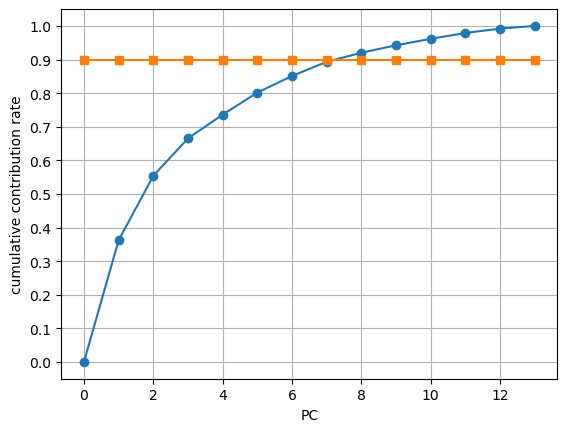

In [30]:
import matplotlib.ticker as ticker
line = np.full(14, 0.9)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), '-o')
plt.xlabel('PC')
plt.ylabel('cumulative contribution rate')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.plot(line, 's-')
plt.grid()
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df_wine.iloc[:, 1:]
X_norm = sc.fit_transform(X)

pca = PCA(n_components = 0.9, random_state = 0)
X_pc = pca.fit_transform(X_norm)

df_pca = pd.DataFrame(X_pc, columns=['PC{}'.format(i + 1) for i in range(len(X_pc[0]))])
print('主成分の数:', pca.n_components_)
print('保たれている情報:', np.round(pca.explained_variance_ratio_, 2))
display(df_pca.head())

主成分の数: 8
保たれている情報: [0.36 0.19 0.11 0.07 0.07 0.05 0.04 0.03]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition, manifold
from sklearn import datasets
from sklearn.decomposition import PCA

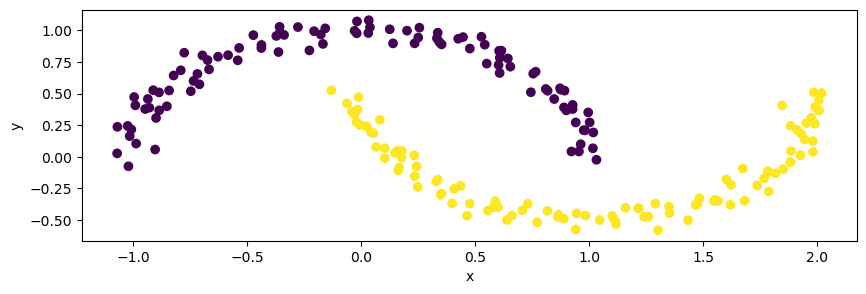

In [70]:
X, Y = datasets.make_moons(n_samples = 200, noise = 0.05, random_state = 0)
sc = StandardScaler()
X_norm = sc.fit_transform(X)
plt.figure(figsize=(10, 3))
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [71]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_norm)

isomap_5 = manifold.Isomap(n_neighbors=5, n_components=2)
X_isomap_5 = isomap_5.fit_transform(X_norm)

isomap_10 = manifold.Isomap(n_neighbors=10, n_components=2)
X_isomap_10 = isomap_10.fit_transform(X_norm)

C:\Users\rollo\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\rollo\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\rollo\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\rollo\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


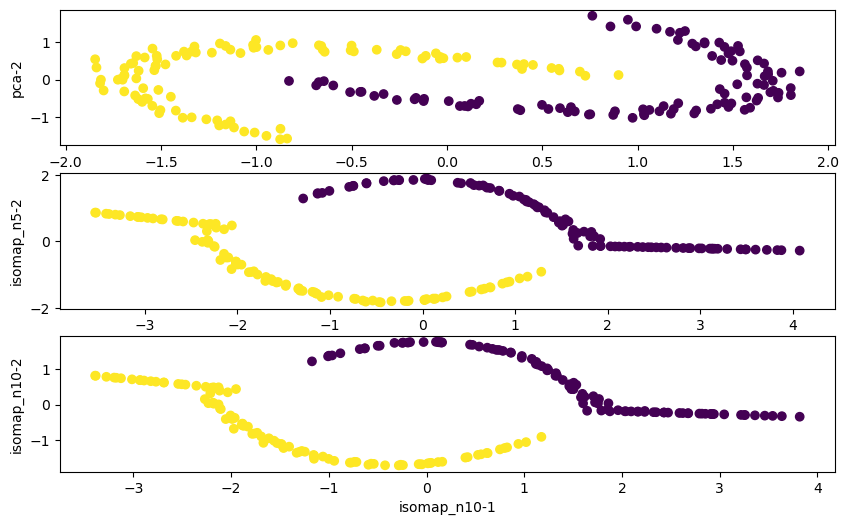

In [75]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.xlabel('pca-1')
plt.ylabel('pca-2')

plt.subplot(3, 1, 2)
plt.scatter(X_isomap_5[:, 0], X_isomap_5[:, 1], c=Y)
plt.xlabel('isomap_n5-1')
plt.ylabel('isomap_n5-2')

plt.subplot(3, 1, 3)
plt.scatter(X_isomap_10[:, 0], X_isomap_10[:, 1], c=Y)
plt.xlabel('isomap_n10-1')
plt.ylabel('isomap_n10-2')
plt.show()

In [76]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


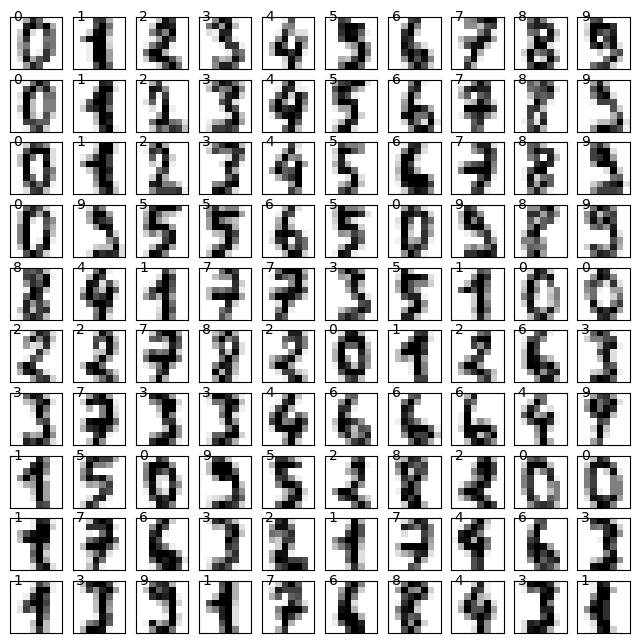

In [90]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0, 0, str(digits.target[i]))

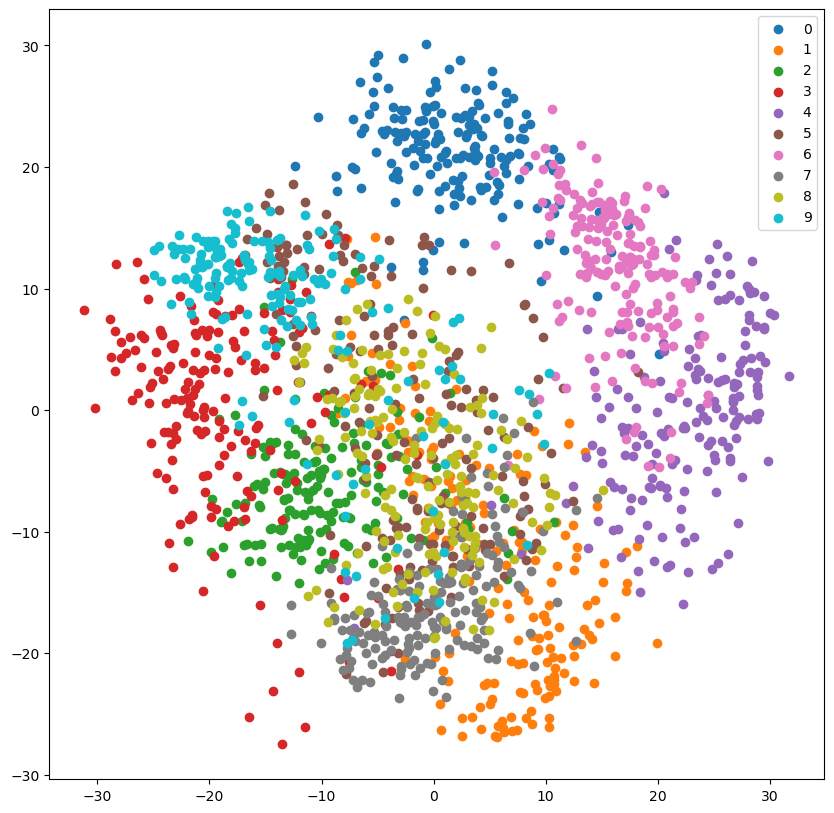

In [133]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(digits.data)
plt.figure(figsize=(10, 10))
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label='{}'.format(each_label))
    plt.legend()
plt.show()    

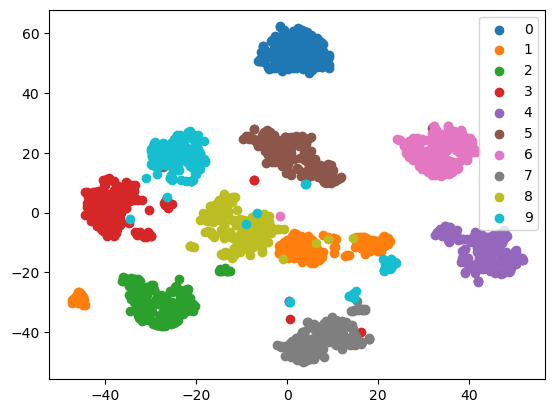

In [137]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label='{}'.format(each_label))
    plt.legend()
plt.show()

In [149]:
import time
def create_2d_tsne(target_X, y, y_labels, perplexity_list=[2, 5, 30, 50, 100]):
    fig, axes = plt.subplots(nrows = 1, ncols = len(perplexity_list), figsize=(5 * len(perplexity_list), 4))
    for i, (ax, perplexity) in enumerate(zip(axes.flatten(), perplexity_list)):
        start_time = time.time()
        tsne = TSNE(n_components=2, random_state = 0, perplexity=perplexity)
        Y = tsne.fit_transform(target_X)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label='{}'.format(each_label))
        end_time = time.time()
        ax.legend()
        ax.set_title('perplexity: {}'.format(perplexity))
        print('perplexity{} is {:.2f} seconds.'.format(perplexity, end_time - start_time))
    plt.show()

perplexity2 is 9.00 seconds.
perplexity5 is 7.78 seconds.
perplexity30 is 10.62 seconds.
perplexity50 is 14.73 seconds.
perplexity100 is 22.18 seconds.


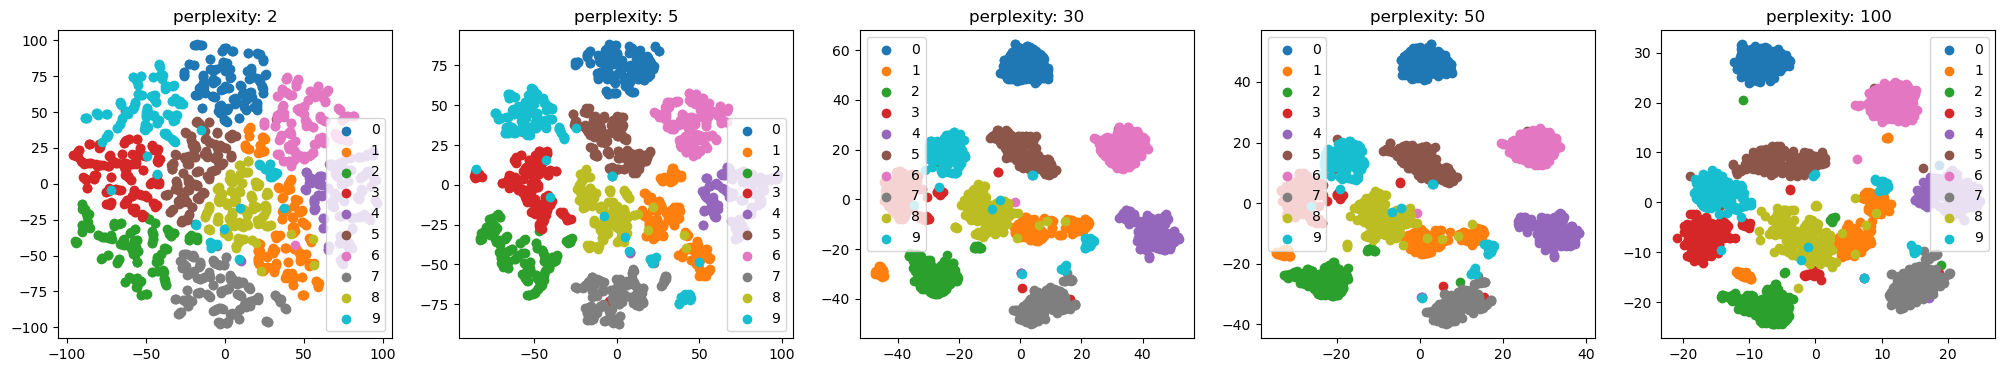

In [150]:
create_2d_tsne(digits.data, digits.target, digits.target_names)

Perplexity 2 is 23.59 seconds
Perplexity 5 is 19.08 seconds
Perplexity 30 is 25.29 seconds
Perplexity 50 is 30.10 seconds
Perplexity 100 is 51.28 seconds


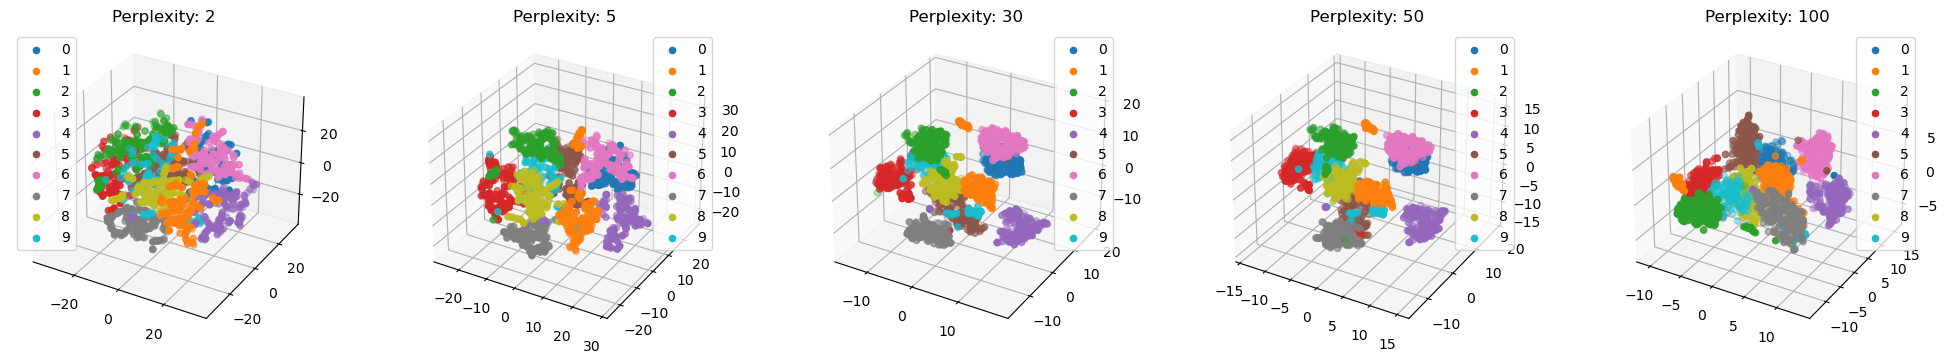

In [178]:
def create_3d_tsne(target_x, y, y_labels, perplexity_list=[2, 5, 30, 50, 100]):
    fig = plt.figure(figsize=(5 * len(perplexity_list), 4))
    for i, perplexity in enumerate(perplexity_list):
        ax = fig.add_subplot(1, len(perplexity_list), i + 1, projection='3d')
        start_time = time.time()
        Y = TSNE(n_components=3, random_state=0, perplexity=perplexity).fit_transform(target_x)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], Y[c_plot_bool, 2], label='{}'.format(each_label))
        end_time = time.time()
        ax.legend()
        ax.set_title('Perplexity: {}'.format(perplexity))
        print('Perplexity {} is {:.2f} seconds'.format(perplexity, end_time - start_time))
    plt.show()
create_3d_tsne(digits.data, digits.target, digits.target_names)

In [177]:
!pip3 install umap-learn

     ---------------------------------------- 88.2/88.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82909 sha256=320f2aae154e0c154ddaa6034adb314d81501b03439d8d9eb210b093e9814ff6
  Stored in directory: c:\users\rollo\appdata\local\pip\cache\wheels\73\d4\20\721044c5f3d1ab1c08a9d6d200964f2543974496570117e59b
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55676 sha256=567d8719a395c397b5ac221a5a339907320c8adaabbda469282338b5140e73ff
  Stored in directory: c:\users\rollo\appdata\local\pip\cache\wheels\45\f6\1b\b2cbeeaddcd5e454a300424e9bc30d5dcd2baaa7b94cfa2795
Successfully built umap-learn pynndescent


In [184]:
import umap

start_time_tsne = time.time()
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)
interval_tsne = time.time() - start_time_tsne

start_time_umap = time.time()
embedding = umap.UMAP(n_components=2, random_state = 0).fit_transform(digits.data)
interval_umap = time.time() - start_time_umap

print('tsne : {}s'.format(np.round(interval_tsne, 2)))
print('umap : {}s'.format(np.round(interval_umap, 2)))
print(start_time_umap)

tsne : 13.43s
umap : 17.5s
1687599073.3436084


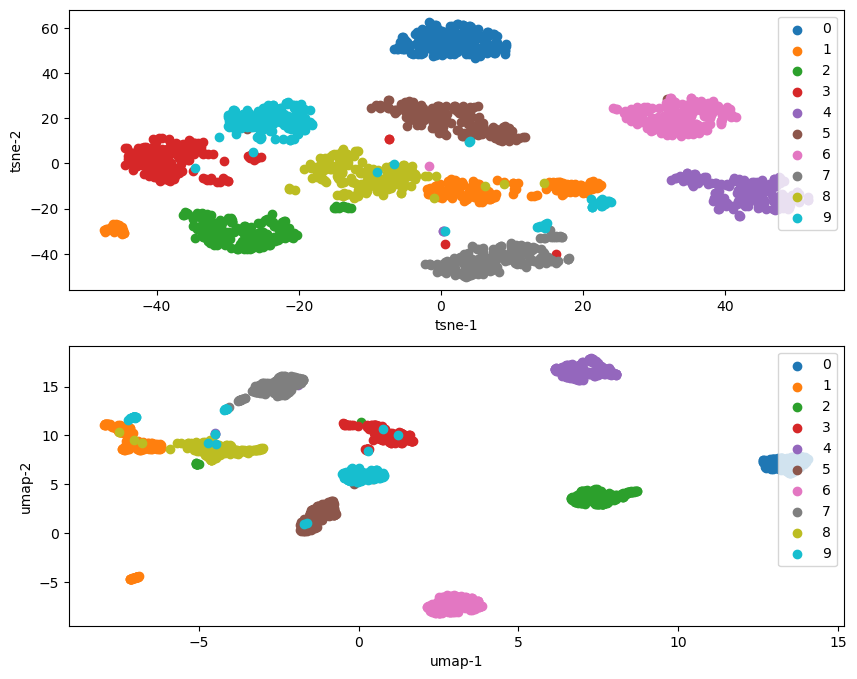

In [183]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(X_reduced[c_plot_bool, 0], X_reduced[c_plot_bool, 1], label='{}'.format(each_label))
plt.legend(loc='upper right')
plt.xlabel('tsne-1')
plt.ylabel('tsne-2')

plt.subplot(2, 1, 2)
for each_label in digits.target_names:
    c_plot_bool = digits.target == each_label
    plt.scatter(embedding[c_plot_bool, 0], embedding[c_plot_bool, 1], label='{}'.format(each_label))
plt.legend(loc='upper right')
plt.xlabel('umap-1')
plt.ylabel('umap-2')
plt.show()

C:\Users\rollo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\rollo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 59 with accuracies 
[2.18910925e-06 2.18640297e-06 9.10922532e-05 9.61933712e-05]
not reaching the requested tolerance 5.97536563873291e-06.
Use iteration 59 instead with accuracy 
4.7915284148576614e-05.

  _, diffusion_map = lobpcg(
C:\Users\rollo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.18910923e-06 2.18640301e-06 9.10922531e-05 9.61933712e-05]
not reaching the requested tolerance 5.97536563873291e-06.
  _, diffusion_map = lobpcg(
C:\Users\rollo\anaconda3\lib\site-packages\umap\spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is lik

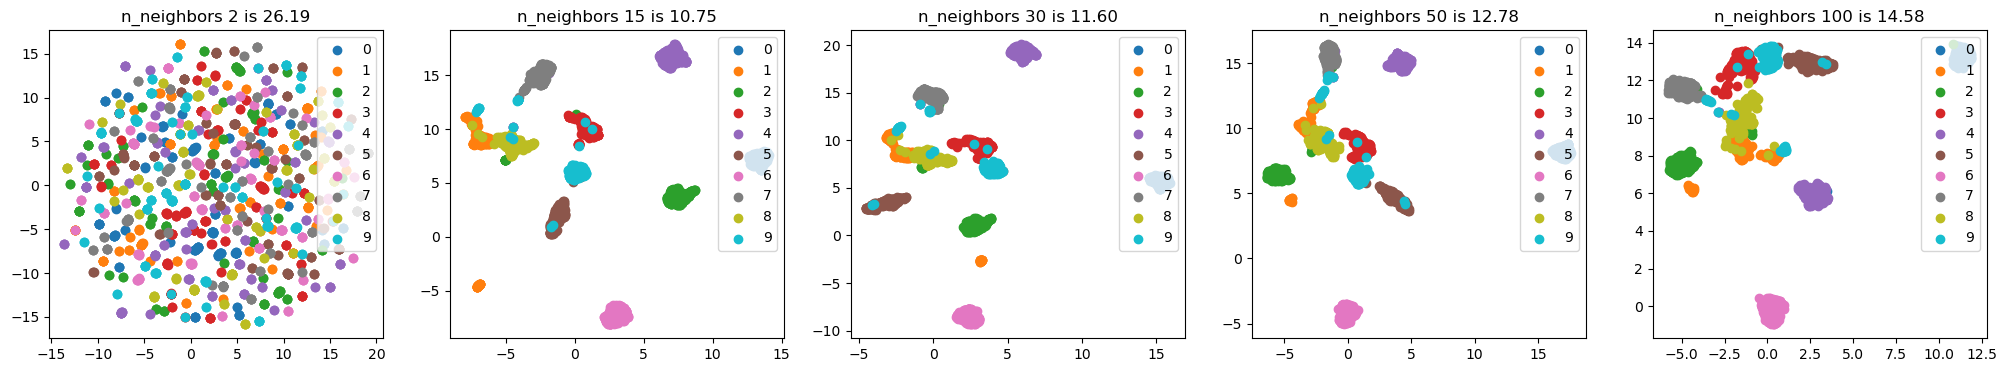

In [189]:
def create_2d_umap(target_x, y, y_labels, n_neighbors_list=[2, 15, 30, 50, 100]):
    fig, axes = plt.subplots(nrows=1, ncols=len(n_neighbors_list), figsize=(5 * len(n_neighbors_list), 4))
    for i, (ax, n_neighbors) in enumerate(zip(axes.flatten(), n_neighbors_list)):
        start_time = time.time()
        Y = umap.UMAP(n_components=2, random_state=0, n_neighbors=n_neighbors).fit_transform(target_x)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label='{}'.format(each_label))
        end_time = time.time()
        ax.legend(loc='upper right')
        ax.set_title('n_neighbors {} is {:.2f}'.format(n_neighbors, end_time - start_time))
    plt.show()
create_2d_umap(digits.data, digits.target, digits.target_names)

C:\Users\rollo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\rollo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 55 with accuracies 
[3.87691966e-06 5.02285885e-06 1.94331145e-05 3.81608717e-06
 1.11358424e-04]
not reaching the requested tolerance 5.97536563873291e-06.
Use iteration 55 instead with accuracy 
2.8701480789668296e-05.

  _, diffusion_map = lobpcg(
C:\Users\rollo\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.87691952e-06 5.02285914e-06 1.94331144e-05 3.81608737e-06
 1.11358424e-04]
not reaching the requested tolerance 5.97536563873291e-06.
  _, diffusion_map = lobpcg(


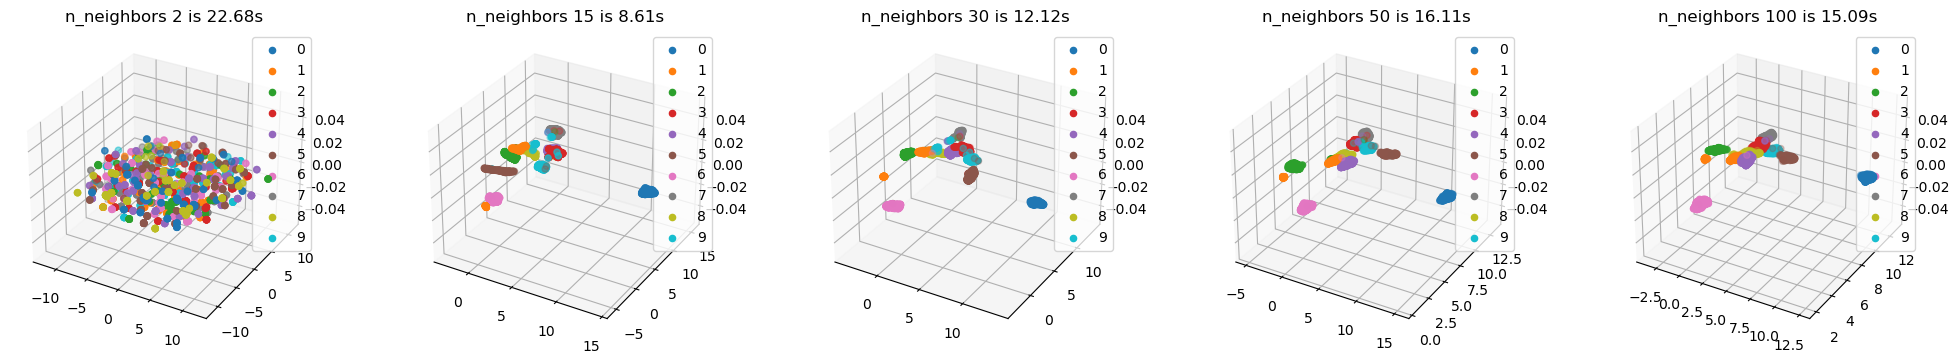

In [193]:
def create_3d_umap(target_x, y, y_labels, n_neighbors_list=[2, 15, 30, 50, 100]):
    fig = plt.figure(figsize=(5*len(n_neighbors_list), 4))
    for i, n_neighbors in enumerate(n_neighbors_list):
        ax = fig.add_subplot(1, len(n_neighbors_list), i+1, projection='3d')
        start_time = time.time()
        Y = umap.UMAP(n_components=3, random_state=0, n_neighbors=n_neighbors).fit_transform(target_x)
        for each_label in y_labels:
            c_plot_bool = y == each_label
            ax.scatter(Y[c_plot_bool, 0], Y[c_plot_bool, 1], label='{}'.format(each_label))
        end_time = time.time()
        ax.legend(loc='upper right')
        ax.set_title('n_neighbors {} is {:.2f}s'.format(n_neighbors, end_time - start_time))
    plt.show()
create_3d_umap(digits.data, digits.target, digits.target_names)

In [201]:
X_pc = PCA(n_components = 0.99, random_state=0).fit_transform(digits.data)

In [205]:
df_pca = pd.DataFrame(X_pc, columns=['PC{}'.format(i + 1) for i in range(len(X_pc[0]))])
print('主成分の数: ', pca.n_components_)
print('保たれている情報: ', np.sum(pca.explained_variance_ratio_))
display(df_pca.head())

主成分の数:  2
保たれている情報:  1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,-1.259466,21.274883,-9.463055,13.014189,-7.128823,-7.440659,3.252837,2.553470,-0.581842,3.625697,...,-0.755016,0.162842,-2.112977,1.094823,0.195686,-0.089994,-2.763741,1.088883,0.206004,1.704511
1,7.957611,-20.768699,4.439506,-14.893664,5.896249,-6.485622,2.126228,-4.615936,3.587450,-1.074705,...,1.290907,-2.154407,0.166806,3.191428,-1.532268,-3.688113,2.073790,-0.230846,0.722354,-1.552377
2,6.991923,-9.955986,2.958558,-12.288302,-18.126023,-4.507664,1.843122,-16.415200,0.719233,4.255805,...,0.450445,0.341085,-0.505617,-2.808245,-1.253872,-0.220568,0.038202,1.108652,3.285183,1.450043
3,-15.906105,3.332464,9.824372,-12.275838,6.965169,1.089483,-1.042085,10.973556,-3.259735,6.498753,...,2.086400,3.220693,-0.826725,-1.392380,2.075339,-1.291333,1.963138,1.893076,0.675706,-0.837613
4,23.306867,4.269061,-5.675129,-13.851524,-0.358124,-2.857574,-0.720497,13.041696,-3.835413,13.414164,...,0.405450,-0.079859,1.284010,1.015915,3.805724,0.627322,-0.159870,-2.986691,-0.397633,0.064666


(1797, 41)


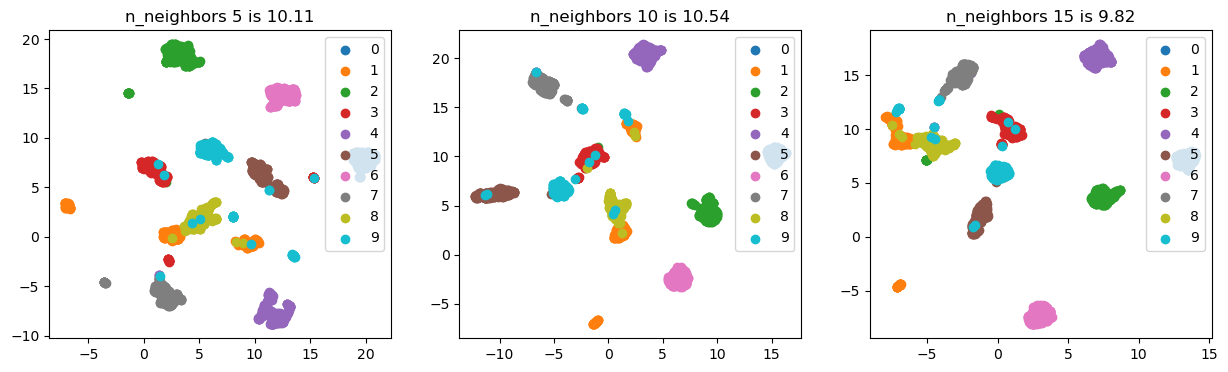

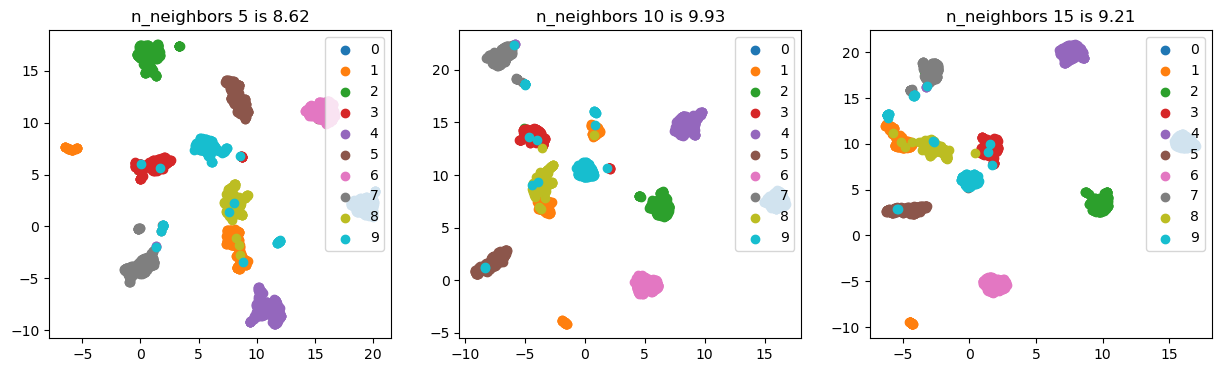

In [208]:
create_2d_umap(digits.data, digits.target, digits.target_names, [5, 10, 15])
create_2d_umap(df_pca, digits.target, digits.target_names, [5, 10, 15])